# Computer Homework #9: Inductors in Circuits
## Due Thursday April 2 11:59pm

In this assignment we will examine the effect of inductors in circuits, and introduce the concept of alternating-current circuits. 

The canonical example of an inductor is a solenoid. When you run a current through a solenoid, it develops a magnetic field. If this current is changing, the magnetic field in the solenoid is changing too. And if that happens, the solenoid experiences a changing magnetic flux through itself. Faraday's law tells us that this will result in an emf in the solenoid that's in a direction to oppose the change in flux. 

The induced emf in the solenoid is proportional to the rate of change of the current, so we can write it as:
$$
    V_L = -L\frac{dI}{dt}.
$$
$L$ is a proportionality constant called the <b>inductance</b>. It's measured in Henries. 

Like capacitance, inductance is a geometrical quantity. We'll calculate it explicitly for a solenoid in class. Physically, inductors prevent currents from changing too quickly. If $dI/dt$ is large, the inductor will generate a large opposing emf that limits the current. Surge protectors are basically big inductors.

Inductors contribute to Kirchhoff's loop rule, just like resistors, capacitors, and batteries do. So we can solve circuits with inductors using techniques similar to what you did in [Computer Homework 5](https://github.com/Phys260WI2020/HW5/blob/master/HW_05.ipynb). You will want to have that assignment at hand when starting this one.  But, one primary difference is that we will use methods in a python `class` to perform the integration.

### Pre-flight:  In class, we will look at how a class might work for the RC circuit from homework 5.  You will need to create a modified class for this homework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class RCCircuit() :
    '''Define a discharging RC Circuit, and use methods to perform the time integration'''
    def __init__(self, R = 10, C = 2e-06, V0_cap = 10, num_timesteps=1000, T=5) :
        '''  This initializes an RCCircuit object, with given R, C, V0 on the capacitor, number of timesteps and period 
        to integrate over.   '''
        self.Q0_cap = C * V0_cap
        self.R = R
        self.C = C
        self.RC = R * C
        self.T = T # Number of time constants to iterate over
        self.num_timesteps = num_timesteps
        
        self.energy_capacitor = 0.5 * C * V0_cap**2
        self.dt = self.RC/num_timesteps
        self.timesteps = np.arange(0, T*self.RC, self.dt)
        
        self.qarray = np.zeros(self.timesteps.shape)
        self.iarray = np.zeros(self.timesteps.shape)
        self.parray = np.zeros(self.timesteps.shape)
    
    def populate(self, inum, Q, I) :
        '''This populates the inum-th index of the three arrays that have been initialized, depending on the 
        present step charge and current. '''
        self.qarray[inum] = Q
        self.iarray[inum] = I
        self.parray[inum] = I**2*self.R
        
    def update(self, Q, I) :
        '''This returns the next step charge and current based on the current step charge and current.'''
        Q = Q-I*self.dt  # dq = dq/dt * dt = I * dt
        I = Q/self.RC
        return Q, I
    
    def solve_circuit(self) :
        Q = self.Q0_cap
        I = self.Q0_cap/self.RC

        for num_timestep in np.arange(self.num_timesteps):
            self.populate(num_timestep, Q, I)
            Q, I = self.update(Q, I)
            
    def calc_energy_dissipated(self) :
        '''Once the circuit is "solved", then we can calculate the energy dissipated'''
        return np.sum(self.parray*self.dt)


**Solve in two lines**: We create an instance of the class RCCircuit, and call it rcc.  Then, we solve the circuit with the method, rcc.solve_circuit()

In [18]:
rcc = RCCircuit(num_timesteps=1000)
rcc.solve_circuit() 
print(rcc.calc_energy_dissipated())
print(rcc.energy_capacitor)

0.00010024618794006534
9.999999999999999e-05


**Plot using the attributes of the class:**  rcc.qarray, rcc.iarray, etc.

Text(0.5,0,'Timesteps')

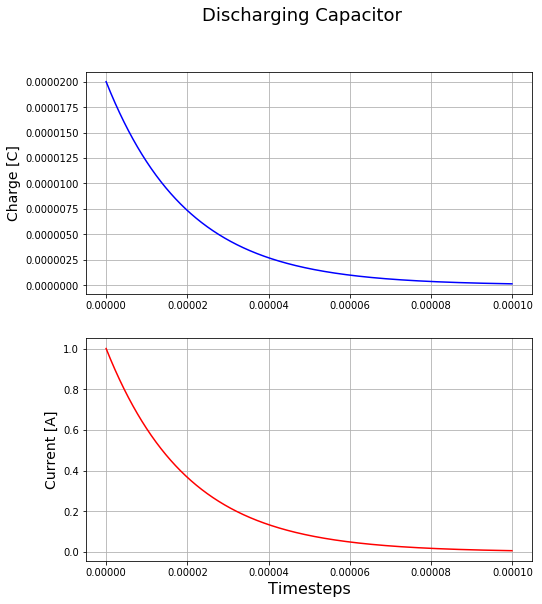

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,9))  
axes = [ax1, ax2]

fig.suptitle('Discharging Capacitor', fontsize=18)
yarrays = [rcc.qarray, rcc.iarray]
ylabels = ['Charge [C]', 'Current [A]']
colors = ['b', 'r']

for ax, yarray, ylabel, color in zip(axes, yarrays, ylabels, colors) :
    ax.plot(rcc.timesteps, yarray, color=color)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)

ax2.set_xlabel('Timesteps', fontsize=16)


## Part 1 (10 points): A simple RL circuit

Consider this circuit:

<img src="http://www-personal.umich.edu/~gerdes/img/LR_DC.jpg">

At $t=0$ the switch is closed.

The loop rule for this circuit reads:
$$
        V - IR -L\frac{dI}{dt} = 0.
$$
This is a first-order differential equation similar to what we encountered earlier for $RC$ circuits. The solution is
$$
        I(t) = \frac{V}{R}\left(1 - e^{-t/\tau}\right),
$$
where 
$$
        \tau = \frac{L}{R}
$$
is the time constant for the circuit (analogous to $RC$ from before). To get the inductor voltage as a function of time, apply the definition from above:
$$
    V_L = -L\frac{dI}{dt} = {V}e^{-t/\tau}.
$$
So the current starts at zero and exponentially approaches its asymptotic value of $V/R$, while the inductor voltage starts out at $V$ and exponentially decays to zero as the current becomes steady.

Let:
* V = 10 Volts
* R = 1 $\Omega$
* L = 1 H

 

<b>Plot</b> the following quantities vs. time, in units of the time constant $\tau=L/R$:
* Voltage across the resistor and inductor 
* Power delivered to the resistor and inductor. Recall that $P = IV$. 

<b>Answer</b> the following questions:
* At what time (in units of $\tau$) is the maximum power being delivered to the inductor? 
* What is the total energy $U$ delivered to the inductor? 
* If you change $L$ while holding $R$ constant, how does $U$ change? 
* If you change $R$ while holding $L$ constant, how does $U$ change?
* If you simultaneously double $R$ and $L$, you get a circuit with the same time constant as before. Is this new circuit equivalent to your original one?

## Part 2 (10 points): Comparison to analytic solution:

* Use the analytic solution to this RL circuit to calulate when the peak power is delivered to the inductor.
* How much total energy is delivered to the inductor for the numbers given above?
* Determine how the total energy delivered to the inductor scales with $R$ and $L$. 

Does your program agree with your calculation?

## Part 3 (10 points): An alternating-current (AC) circuit

In Part 1, we considered a constant voltage source. But your code can easily accommodate a situation where the current is changing in time. Simply update $V$ at each time step along with the other values in the circuit. Let's replace the battery in Part 1 with a generator that produces a sinusoidal voltage,
$$
            V = V_0\sin\omega t.
$$

<img src="http://www-personal.umich.edu/~gerdes/img/LR_AC.jpg">

Now there are two different timescales in the problem: the characteristic time of the $RL$ circuit $\tau = L/R$, and the period of the generator, $2\pi/\omega$. In this part of the assignment, you'll hold $\tau$ fixed and investigate what happens as you change $\omega$.

Let 
* $V_0 = 10$ Volts
* $L = 1$ H
* $R = 1~\Omega$

<b>Make the following plots:</b>
* Let $\omega = R/L$, and plot $V_L$ and $V_R$ on the same time axis. Do they reach their peak values at the same time? If not, what is the phase difference between these two sinusoidal voltages?
* Allow $\omega$ to vary from $0.01/\tau$ to $100/\tau$ in equal logarithmic spacings (read the <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.logspace.html">numpy documentation</a> and use the function ```np.logspace()```), and make a log-log plot of $V_{L,\mathrm{peak}}/V_0$ vs. $\omega$. (This is known as a <i>Bode plot</i>.) Note: you will want to modify your timestep so that it's a small fraction of a generator period. Make sure to wait at least a few full generator cycles before evaluating $V_{L,\mathrm{peak}}$, to allow any transitory behavior due to initial conditions to be washed out. 


## Part 4 (10 points): Discussion

* What happens when $\omega\ll 1/\tau$? When $\omega \gg 1/\tau$? When $\omega \approx 1/\tau$?
* Suppose that, instead of driving this circuit with a single frequency $\omega$, you gave it an input signal that consisted of a mixture of different frequencies -- for example, an electrical representation of a piece of music. What would the output of this circuit do to such a signal? Can you think of any applications for a circuit like this? 